# Mandatory Assigment 1 Part B

### Exercice 2 Downloading text and Zipf's law

Question a.

In [1]:
from urllib import request
import nltk

url = "https://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')
type(raw)
len(raw)
raw[:75]

'The Project Gutenberg eBook of The Adventures of Tom Sawyer, by Mark Twain\r'

Question b & c.

In [2]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(raw)
type(tokens)
len(tokens)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Adventures',
 'of',
 'Tom',
 'Sawyer']

In [3]:
raw.find("START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER")

776

In [4]:
raw.rfind("END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER")

402279

In [5]:
raw = raw[7977:402279] 
raw.find("HARTFORD, 1876.")

0

In [6]:
import string 
import re 
from string import punctuation

raw_stripped = raw.lower()  
raw_stripped = re.sub(f"[{re.escape(punctuation)}]", "", raw_stripped)  
raw_stripped = re.sub(f"“", "", raw_stripped)  
raw_stripped = re.sub(f"”", "", raw_stripped)  
raw_stripped = re.sub(f"—", "", raw_stripped) 
raw_stripped = re.sub(f"’", "", raw_stripped) 
raw_stripped = " ".join(raw_stripped.split()) 


In [7]:
tokens = word_tokenize(raw_stripped)
type(tokens)
len(tokens)
tokens[:10]

['hartford',
 '1876',
 'chapter',
 'i',
 'tom',
 'no',
 'answer',
 'tom',
 'no',
 'answer']

In this section we have cleaned up the text. We have therefore selected only the text that interests us by removing the appendices and copyrights. Then we put the text in lower case, removed the punctuation marks. In the text, we can see some punctuation marks that are variants, I had to remove them one by one. 

Question d.

In [8]:
import pandas as pd


fdist1 = nltk.FreqDist(tokens)

tt=fdist1.most_common(20)

for k, v in tt:
    v=v/len(tokens)*100
    print("%s : %s" % (k, v))


the : 5.252834726835414
and : 4.277860497079372
a : 2.565570954071698
to : 2.4367197342801514
of : 2.051597755125415
he : 1.6893826594891765
was : 1.6693391364104915
it : 1.593460084755469
in : 1.3357576451723743
that : 1.2713320352766007
his : 1.1653876990035505
you : 1.086645286908716
i : 1.0623067231703127
tom : 0.9606574275569808
with : 0.9191387011797045
but : 0.7774023594090024
they : 0.7731073187492842
had : 0.7315885923720078
for : 0.7158401099530409
him : 0.6113274538998968


Question e.

In [9]:
occurs = []
x=1

while x<11:
    filter_words = dict([(m, n) for m, n in fdist1.items() if n == x+1])
    occurs.append([x,len(filter_words)])
    print("Words occur %s time : %s" % (x, len(filter_words)))
    x=x+1
    



Words occur 1 time : 1227
Words occur 2 time : 580
Words occur 3 time : 388
Words occur 4 time : 220
Words occur 5 time : 173
Words occur 6 time : 151
Words occur 7 time : 124
Words occur 8 time : 75
Words occur 9 time : 96
Words occur 10 time : 66


In [10]:
filter_words_11_50 = dict([(m, n) for m, n in fdist1.items() if n >10 if n<51])

occurs.append(['11-50',len(filter_words_11_50)])

print("Words occur between 11 and 50 times : %s" % len(filter_words_11_50))

Words occur between 11 and 50 times : 493


In [11]:
filter_words_51_100 = dict([(m, n) for m, n in fdist1.items() if n >50 if n<101])

occurs.append(['50-100',len(filter_words_51_100)])

print("Words occur between 50 and 100 times : %s" % len(filter_words_51_100))

Words occur between 50 and 100 times : 82


In [12]:
filter_words_100 = dict([(m, n) for m, n in fdist1.items() if n >100])

occurs.append([100,len(filter_words_100)])

print("Words occur more than 100 times : %s" % len(filter_words_100))

Words occur more than 100 times : 97


In [13]:
table = pd.DataFrame(occurs)
table.columns = ['Occurences','Number of words']
table

,Occurences,Number of words
0,1,1227
1,2,580
2,3,388
3,4,220
4,5,173
5,6,151
6,7,124
7,8,75
8,9,96
9,10,66


Question f.

In [14]:
from collections import Counter

cnt = nltk.FreqDist(tokens)

words_by_frequencie=cnt.most_common(len(cnt))


In [15]:
x=1
Zipf=[]

while x<21:
    Zipf.append((x,x*words_by_frequencie[x-1][1]))
    x=x+1
    
table_Zipf = pd.DataFrame(Zipf)
table_Zipf.columns = ['Rank','Zipf']

table_Zipf

,Rank,Zipf
0,1,3669
1,2,5976
2,3,5376
3,4,6808
4,5,7165
5,6,7080
6,7,8162
7,8,8904
8,9,8397
9,10,8880


We can see that from the 6th or 7th rank, Zipf's law stabilises and is close to being constant. It seems logical that the first ranks are not exactly average.
As in the graph of Zipf's law, we see that the first values of r*n are not all constant. This stabilises from a certain rank. This confirms our calculations in this part

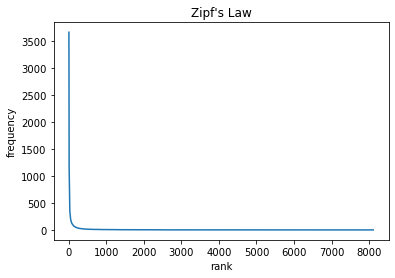

In [16]:
import matplotlib.pyplot as plt

x=1
rank=[]
freq=[]
while x<len(cnt)+1:
    rank.append(x)
    freq.append(words_by_frequencie[x-1][1])
    x=x+1


plt.plot(rank,freq)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title("Zipf's Law")
plt.show()

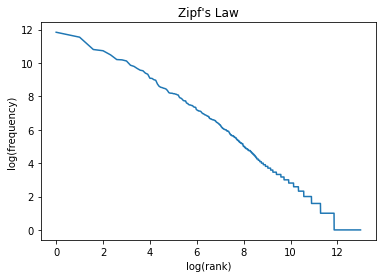

In [17]:
import numpy as np

x=1
rank=[]
freq=[]
while x<len(cnt)+1:
    rank.append(np.log2(x))
    freq.append(np.log2(words_by_frequencie[x-1][1]))
    x=x+1
    
    
plt.plot(rank,freq)
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("Zipf's Law")
plt.show()